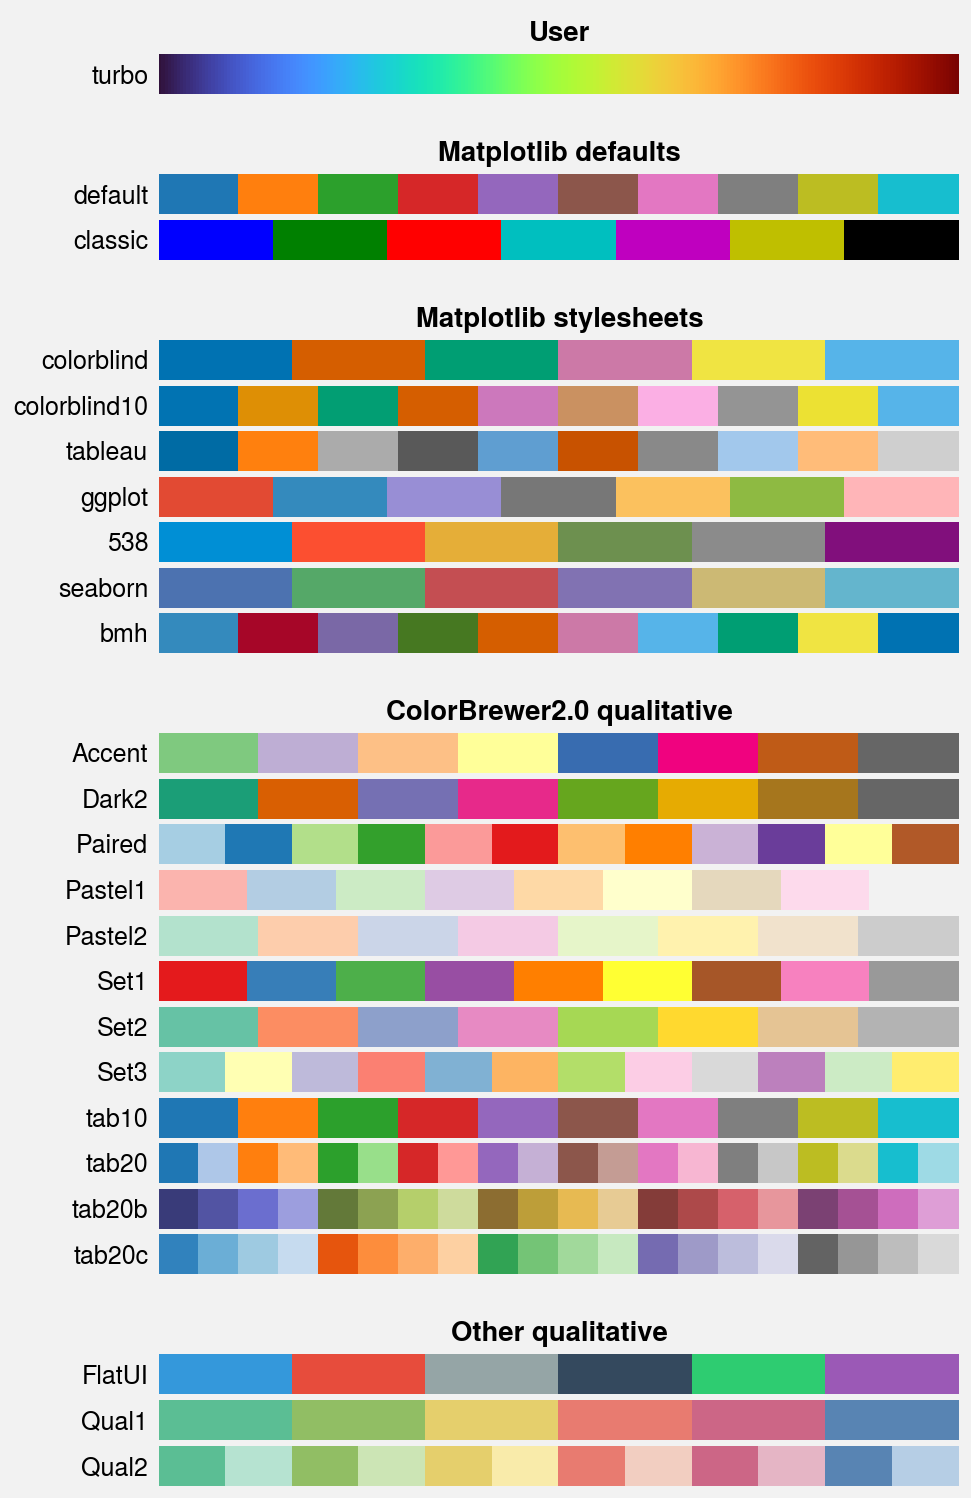

In [1]:
import proplot as pplt
fig, axs = pplt.show_cycles()

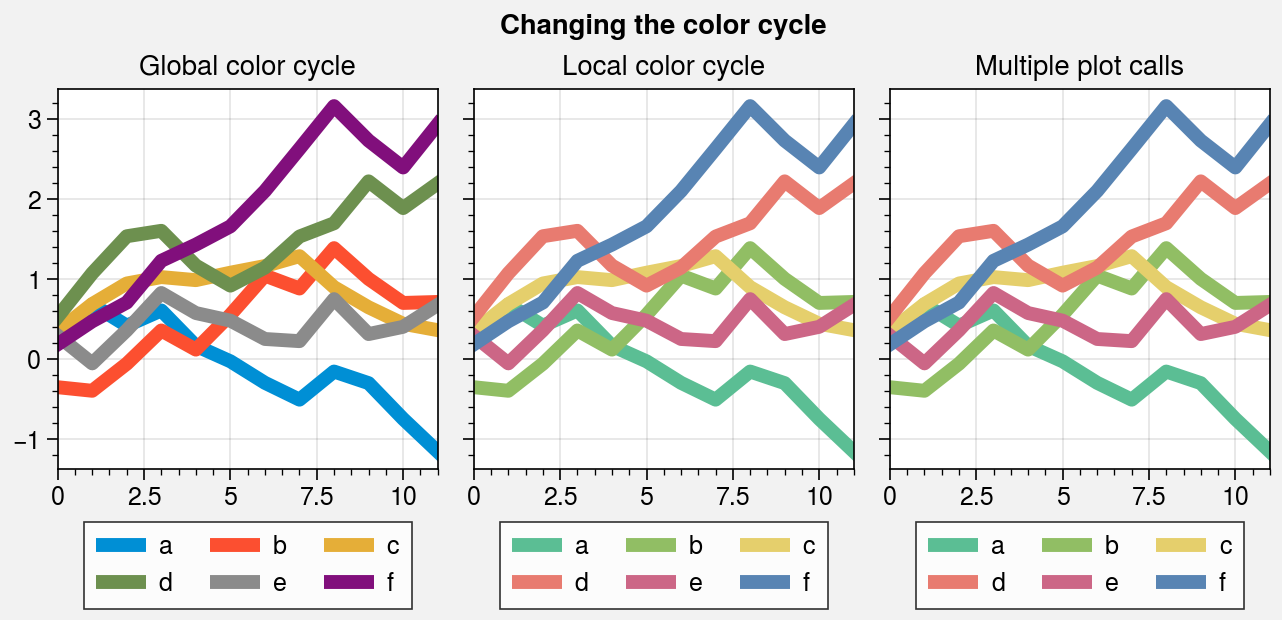

In [2]:
import proplot as pplt
import numpy as np

# Sample data
state = np.random.RandomState(51423)
data = (state.rand(12, 6) - 0.45).cumsum(axis=0)
kwargs = {'legend': 'b', 'labels': list('abcdef')}

# Figure
lw = 5
pplt.rc.cycle = '538'
fig, axs = pplt.subplots(ncols=3, refwidth=1.9)
axs.format(suptitle='Changing the color cycle')

# Modify the default color cycle
ax = axs[0]
ax.plot(data, lw=lw, **kwargs)
ax.format(title='Global color cycle')

# Pass the cycle to a plotting command
ax = axs[1]
ax.plot(data, cycle='qual1', lw=lw, **kwargs)
ax.format(title='Local color cycle')

# As above but draw each line individually
# Note that passing cycle=name to successive plot calls does
# not reset the cycle position if the cycle is unchanged
ax = axs[2]
labels = kwargs['labels']
for i in range(data.shape[1]):
    ax.plot(data[:, i], cycle='qual1', legend='b', label=labels[i], lw=lw)
ax.format(title='Multiple plot calls')

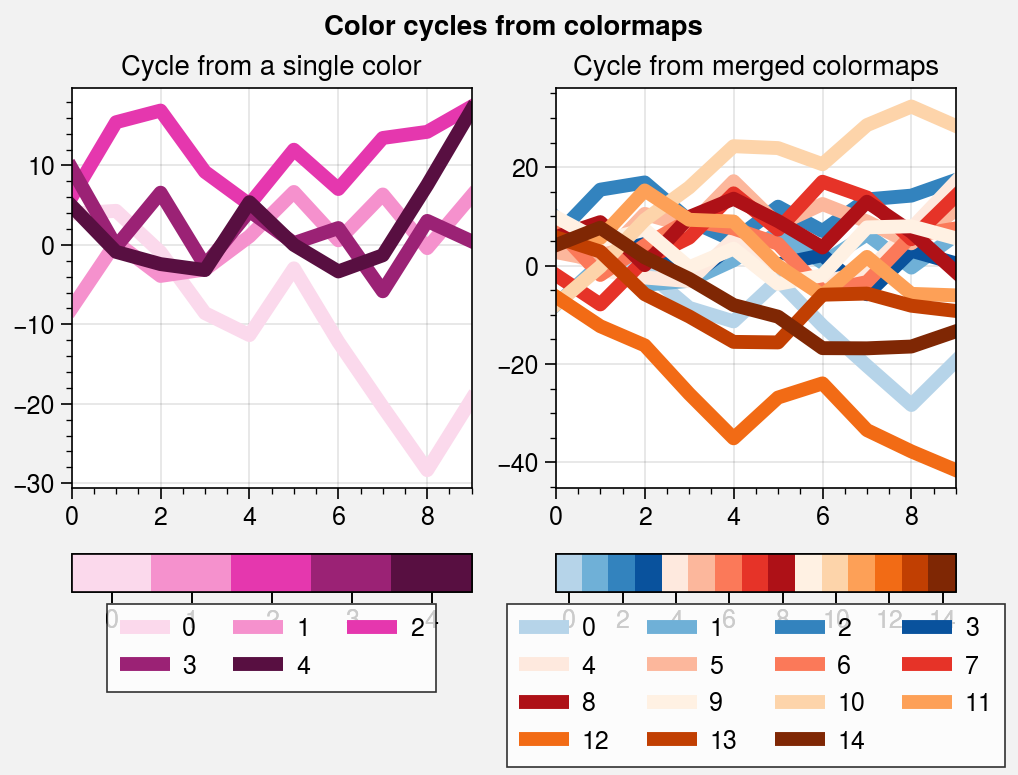

In [3]:
import proplot as pplt
import numpy as np
fig, axs = pplt.subplots(ncols=2, share=0, refwidth=2)
state = np.random.RandomState(51423)
data = (20 * state.rand(10, 21) - 10).cumsum(axis=0)

# Cycle from on-the-fly monochromatic colormap
ax = axs[0]
lines = ax.plot(data[:, :5], cycle='plum', lw=5)
fig.colorbar(lines, loc='b', col=1, values=np.arange(0, len(lines)))
fig.legend(lines, loc='b', col=1, labels=np.arange(0, len(lines)))
ax.format(title='Cycle from a single color')

# Cycle from registered colormaps
ax = axs[1]
cycle = pplt.Cycle('blues', 'reds', 'oranges', 15, left=0.1)
lines = ax.plot(data[:, :15], cycle=cycle, lw=5)
fig.colorbar(lines, loc='b', col=2, values=np.arange(0, len(lines)), locator=2)
fig.legend(lines, loc='b', col=2, labels=np.arange(0, len(lines)), ncols=4)
ax.format(
    title='Cycle from merged colormaps',
    suptitle='Color cycles from colormaps'
)

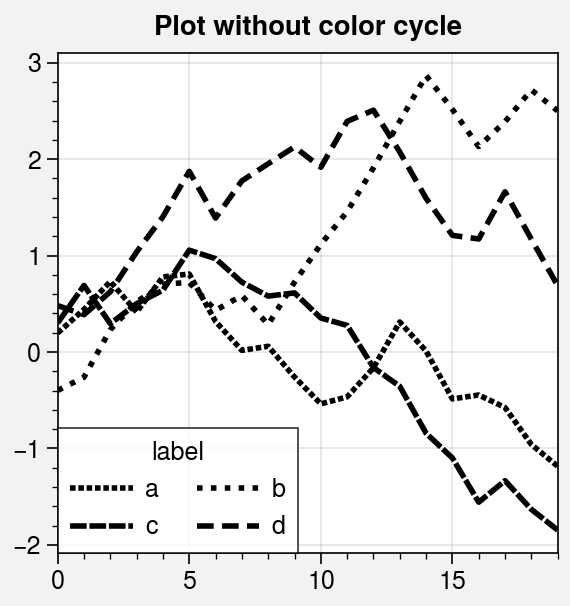

In [4]:
import proplot as pplt
import numpy as np
import pandas as pd

# Cycle that loops through 'dashes' Line2D property
cycle = pplt.Cycle(lw=2, dashes=[(1, 0.5), (1, 1.5), (3, 0.5), (3, 1.5)])

# Sample data
state = np.random.RandomState(51423)
data = (state.rand(20, 4) - 0.5).cumsum(axis=0)
data = pd.DataFrame(data, columns=pd.Index(['a', 'b', 'c', 'd'], name='label'))

# Plot data
fig, ax = pplt.subplots(refwidth=2.5)
ax.format(suptitle='Plot without color cycle')
obj = ax.plot(
    data, cycle=cycle, legend='ll',
    legend_kw={'ncols': 2, 'handlelength': 2.5}
)